# 1. Setup and Gathering Data

Checking if the current jupyter nb is using the scRNA conda env

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
import sys
print(sys.executable)

/usr/bin/python3


The below steps from 1-5 is done for a single sample to get a feel of what to expect. In step 6 we write a function to process all 27 samples together

In [3]:
!pip install scvi-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.2/745.2 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 38.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 

In [4]:
!pip install "scvi-tools[tutorials]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 145.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/6

In [5]:
!pip install scanpy

In [6]:
import scanpy as sc

scanpy requires columns to be genes and rows to be cells. so, we transpose the raw counts matrix which has 6099 cells in rows and 34546 genes in columns

In [7]:
adata = sc.read_csv('/raw_counts/GSM5226574_C51ctr_raw_counts.csv.gz').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [8]:
# cell barcodes
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [9]:
# genes
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


# 2. Pre-processing - Doublet Removal
This is done to remove two or more cells from a single droplet that might have happened during single cell library preparation

In [10]:
import scvi

2.1 filtering to keep genes that are only found in at least 10 cells which brings down the total number of cells down to 19896. further filtering is done to keep only the 2000 top most variable genes - which would describe the data we have the best.

In [11]:
sc.pp.filter_genes(adata, min_cells = 10)
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

2.2 training the model to predict doublets

In [12]:
!pip install torch torchvision

In [13]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|██████████| 400/400 [02:26<00:00,  2.81it/s, v_num=1, train_loss_step=315, train_loss_epoch=324]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:26<00:00,  2.72it/s, v_num=1, train_loss_step=315, train_loss_epoch=324]


In [14]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/co

Epoch 336/400:  84%|████████▍ | 336/400 [02:20<00:26,  2.39it/s, v_num=1, train_loss_step=0.361, train_loss_epoch=0.288]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.271. Signaling Trainer to stop.


In [15]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1_1,1.069761,-1.487433,doublet
ATTCACTGTAACAGGC-1_1,1.326715,-1.826563,doublet
TAACTTCCAACCACGC-1_1,-0.277052,0.028627,singlet
TTGGGTACACGACAAG-1_1,1.338344,-1.812320,doublet
AGGCCACAGAGTCACG-1_1,1.269762,-1.593662,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1_1,-1.908316,1.840996,singlet
CACTGGGGTCTACGTA-1_1,-2.105793,1.909228,singlet
CATACTTGTAGAGGAA-1_1,-3.134811,1.795392,singlet
TTTGGTTTCCACGGAC-1_1,-3.218624,3.419815,singlet


In [16]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1345,1345
singlet,4754,4754


2.3 Visualizing the predictions

The prediction gives over 20% of the data as doublets, so we add another column that is the difference of the confidence in the prediction. We then plot the distribution of this difference

In [17]:
df['difference'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,difference
TAGGTACCATGGCCAC-1_1,1.069761,-1.487433,doublet,2.557194
ATTCACTGTAACAGGC-1_1,1.326715,-1.826563,doublet,3.153278
TAACTTCCAACCACGC-1_1,-0.277052,0.028627,singlet,-0.305678
TTGGGTACACGACAAG-1_1,1.338344,-1.812320,doublet,3.150663
AGGCCACAGAGTCACG-1_1,1.269762,-1.593662,doublet,2.863425
...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,-1.908316,1.840996,singlet,-3.749312
CACTGGGGTCTACGTA-1_1,-2.105793,1.909228,singlet,-4.015022
CATACTTGTAGAGGAA-1_1,-3.134811,1.795392,singlet,-4.930202
TTTGGTTTCCACGGAC-1_1,-3.218624,3.419815,singlet,-6.638439


In [18]:
import seaborn as sns
import pandas as pd

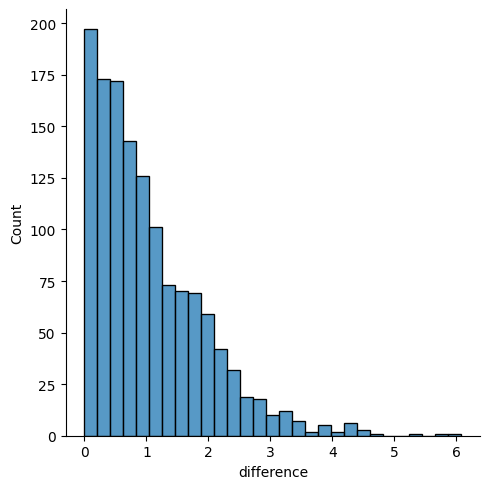

In [19]:
sns.displot(df[df.prediction == 'doublet'], x = 'difference')

The graph reveals that the cells that were predicted as doublet were only categorized as so due to a marginal difference. We are going to keep the cells with a diff < 1 and classify the cells with a diff > 1 as a doublet

In [20]:
doublets = df[(df.prediction == 'doublet') & (df.difference > 1)]
doublets

,doublet,singlet,prediction,difference
TAGGTACCATGGCCAC-1_1,1.069761,-1.487433,doublet,2.557194
ATTCACTGTAACAGGC-1_1,1.326715,-1.826563,doublet,3.153278
TTGGGTACACGACAAG-1_1,1.338344,-1.812320,doublet,3.150663
AGGCCACAGAGTCACG-1_1,1.269762,-1.593662,doublet,2.863425
CACTGAAGTCGAAGCA-1_1,1.245448,-1.483142,doublet,2.728590
...,...,...,...,...
ATACTTCTCATGCGGC-1_1,0.488764,-0.537107,doublet,1.025871
CAATACGCAATGTGGG-1_1,0.417782,-1.511191,doublet,1.928974
AAAGAACGTACACTCA-1_1,1.023842,-1.043027,doublet,2.066869
GAGACTTAGCGCTGCT-1_1,0.936343,-1.039910,doublet,1.976253


2.3 Filtering out doblets from the original adata object. We keep the cells that are labelled as False

In [21]:
adata = sc.read_csv('/raw_counts/GSM5226574_C51ctr_raw_counts.csv.gz').T
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,True
ATTCACTGTAACAGGC-1_1,True
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,True
AGGCCACAGAGTCACG-1_1,True
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [22]:
# ~ represents keeping False
adata = adata[~adata.obs.doublet]
adata

View of AnnData object with n_obs × n_vars = 5538 × 34546
    obs: 'doublet'

# 3. Preprocessing - Cell annotation & QC metrics

3.1 First step is to annotate the mitochondrial genes, for human starts with MT-
There are 13 mitochondrial genes in humans

In [23]:
adata.var['MT'] = adata.var.index.str.startswith('MT-')

<ipython-input-23-1c0b0d745615>:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['MT'] = adata.var.index.str.startswith('MT-')


In [24]:
adata.var

,MT
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


3.2 Annotating the human ribosomal genes, using a list from the Broad Institute

In [25]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows = 2, header = None)

In [26]:
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [27]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [28]:
adata.var

,MT,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


3.3 Calculating QC metrics for MT and ribosomal genes

In [29]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['MT', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [30]:
adata.var

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,6,0.001083,99.891658,6.0
AL627309.5,False,False,26,0.004695,99.530516,26.0
AL627309.4,False,False,2,0.000361,99.963886,2.0
AL669831.2,False,False,2,0.000361,99.963886,2.0
LINC01409,False,False,221,0.042976,96.009390,238.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [31]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319
TGGGAAGTCAGTGATC-1_1,False,4719,11238.0,92.0,0.818651,11.0,0.097882
TCTATCACAAGGCTTT-1_1,False,3582,8276.0,183.0,2.211213,5.0,0.060416
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [32]:
adata.var.sort_values('n_cells_by_counts')

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL356277.2,False,False,0,0.000000,100.000000,0.0
Z98880.1,False,False,0,0.000000,100.000000,0.0
TRBVA,False,False,0,0.000000,100.000000,0.0
AC021451.2,False,False,0,0.000000,100.000000,0.0
AP003550.1,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,3959,2.791802,28.512098,15461.0
MBNL1,False,False,4034,2.626219,27.157819,14544.0
NEAT1,False,False,4045,4.843806,26.959191,26825.0
ZBTB20,False,False,4181,2.389491,24.503431,13233.0


3.4 Filtering out genes that were not in at least 3 cells, this brings the total genes down to ~ 24k

In [33]:
sc.pp.filter_genes(adata, min_cells=3)
adata.var.sort_values('n_cells_by_counts')

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AC124248.2,False,False,3,0.000542,99.945829,3.0,3
AC068831.4,False,False,3,0.000542,99.945829,3.0,3
AC068831.1,False,False,3,0.000542,99.945829,3.0,3
AC068870.2,False,False,3,0.000542,99.945829,3.0,3
LINC02115,False,False,3,0.000542,99.945829,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,3959,2.791802,28.512098,15461.0,3959
MBNL1,False,False,4034,2.626219,27.157819,14544.0,4034
NEAT1,False,False,4045,4.843806,26.959191,26825.0,4045
ZBTB20,False,False,4181,2.389491,24.503431,13233.0,4181


In [34]:
adata.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo
GTCGTTCTCCAAGGGA-1_1,False,300,401.0,0.0,0.000000,0.0,0.000000
TGGTACAGTTGGTGTT-1_1,False,323,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,False,308,401.0,0.0,0.000000,0.0,0.000000
CAGGGCTTCATGCGGC-1_1,False,330,401.0,7.0,1.745636,1.0,0.249377
AGGCATTCATCCGTTC-1_1,False,290,401.0,1.0,0.249377,0.0,0.000000
...,...,...,...,...,...,...,...
TCTATCACAAGGCTTT-1_1,False,3582,8276.0,183.0,2.211213,5.0,0.060416
TGGGAAGTCAGTGATC-1_1,False,4719,11238.0,92.0,0.818651,11.0,0.097882
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319


It looks like when this dataset was processed, the authors got rid of cells that had a count of 400 or fewer (total_counts)
sc.pp.filter_cells(adata, min_genes=200). The min number of n_genes_by_counts here is 276 so filtering is not necessary

3.5 Plotting QC metrics to look for outliers
Here we're filtering out genes above the 98th percentile

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

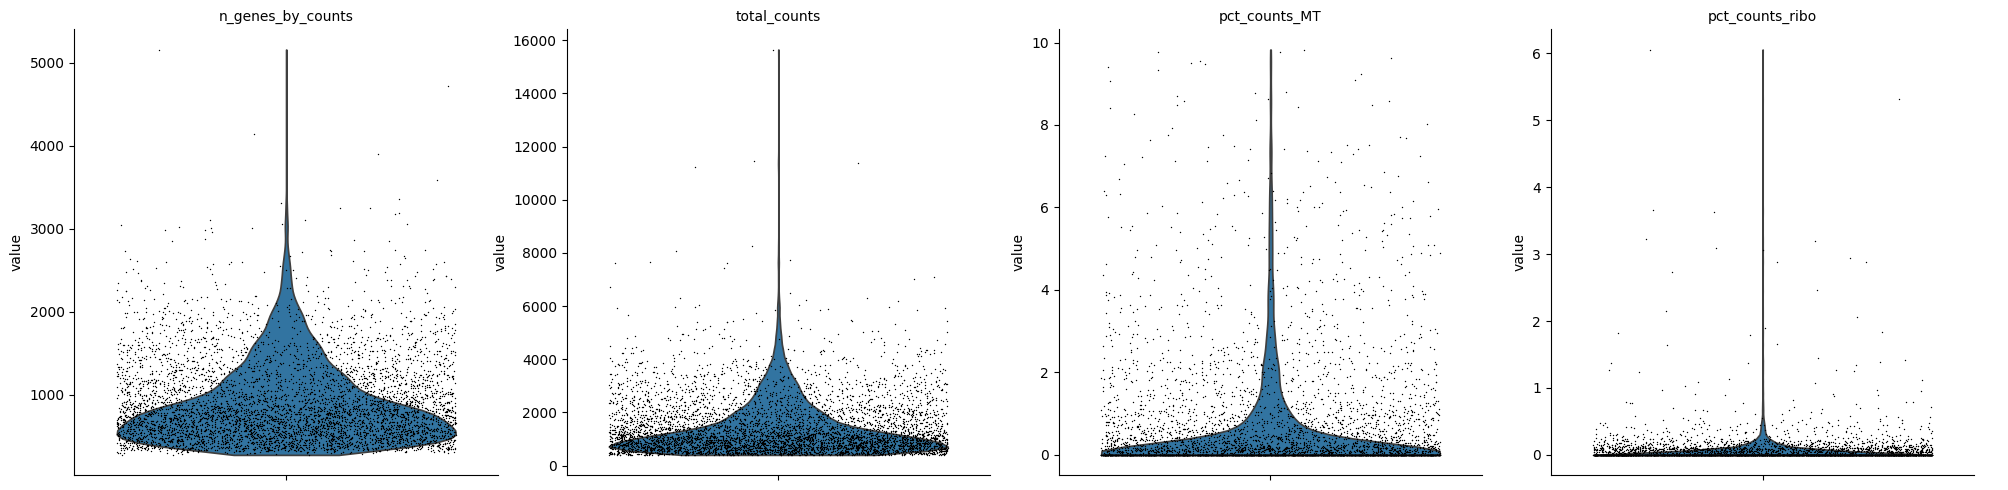

In [35]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [36]:
import numpy as np

upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
upper_lim

#upper_lim = 3000

2192.040000000001

In [37]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]
adata.obs


,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo
ATACTTCCAAGGTCTT-1_1,False,2122,5252.0,1.0,0.019040,4.0,0.076161
GATAGCTCAGGCTTGC-1_1,False,2167,4879.0,0.0,0.000000,0.0,0.000000
GACCCAGCACCCTATC-1_1,False,2150,4784.0,28.0,0.585284,4.0,0.083612
ATGCATGCAAACGTGG-1_1,False,2191,4747.0,0.0,0.000000,1.0,0.021066
CATAAGCCACCCAACG-1_1,False,2126,4728.0,1.0,0.021151,2.0,0.042301
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


The values 20 and 2 were inferred from the violin plot

In [38]:
adata = adata[adata.obs.pct_counts_MT < 20]
adata = adata[adata.obs.pct_counts_ribo < 2]
adata

View of AnnData object with n_obs × n_vars = 5412 × 23994
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'MT', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

# 4. Normalization

This is done to overcome sequencing biases and cell variation - between cell types and even with the same cell type. So we can compare the cells and genes in the data

Since each row in adata represents a cell, we are calculating the sum of each row to obtain the total counts for each of the cells

In [39]:
adata.X.sum(axis = 1)

array([5250., 4877., 4783., ...,  410.,  405.,  410.], dtype=float32)

We are now going to normalize the counts in each cell so the total counts in every row add up to the same value, in this case 10,000 (10k UMI)

In [40]:
sc.pp.normalize_total(adata, target_sum=1e4)
adata.X.sum(axis = 1)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


array([10000.001, 10000.   , 10000.   , ..., 10000.   , 10000.   ,
       10000.   ], dtype=float32)

We are now converting the normalized counts to normalized log counts

In [41]:
sc.pp.log1p(adata)
adata.X.sum(axis = 1)

array([2858.1602, 3131.0637, 3076.6458, ..., 1191.2706, 1022.7511,
       1162.8784], dtype=float32)

In [42]:
adata.raw = adata

# 5. Dimensionality Reduction

5.1 Genes with higher dispersion were marked as highly variable genes so this reduced the data ten-fold

In [43]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
adata.var

,MT,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,6,0.001083,99.891658,6.0,6,True,0.011297,2.764073,1.229048
AL627309.5,False,False,26,0.004695,99.530516,26.0,26,False,0.028308,2.337773,-0.085771
LINC01409,False,False,221,0.042976,96.009390,238.0,221,False,0.264465,2.348820,-0.051699
FAM87B,False,False,6,0.001083,99.891658,6.0,6,False,0.007357,1.947410,-1.289750
LINC01128,False,False,69,0.013001,98.754063,72.0,69,False,0.111078,2.518189,0.470680
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,113,0.020766,97.959552,115.0,113,False,0.155457,2.429817,0.198116
AL592183.1,False,False,846,0.180209,84.723727,998.0,846,False,0.875673,2.516691,-0.407644
AC240274.1,False,False,139,0.025822,97.490069,143.0,139,False,0.155083,2.306398,-0.182538
AC007325.4,False,False,4,0.000722,99.927772,4.0,4,False,0.002598,1.662106,-2.169703


5.2 Visualizing the highly variable genes

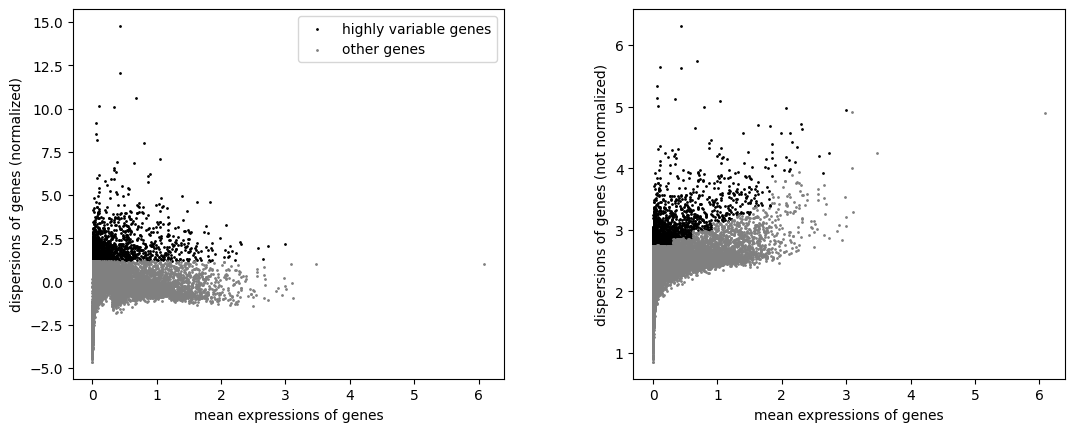

In [44]:
sc.pl.highly_variable_genes(adata)

adata now has only the 2000 most highly variable genes

In [45]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 5412 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'MT', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

5.3 Regressing Out

We now regress out the differences that arise due to the total counts, mitochondrial counts and the ribosomal counts. In doing this, we eliminate some of the variations in the data that are due to processing, sample quality etc

In [46]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_MT', 'pct_counts_ribo'])

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


5.4 Normalizing each gene to its unit variance.

Normalizing each gene to its unit variance is a part of the preprocessing step to transform the expression values such that the variance of each gene becomes 1. This is done to:

  a. prevent highly expressed genes from dominating the analysis just because they have higher expression values.

  b. to remove technical noise and variability between genes
  
  c. to perform PCA which requires all genes to have comparable scales

which can help in identifying biological signals in scRNA-seq data more effectively.

In [47]:
sc.pp.scale(adata, max_value=10)

5.5 PCA to reduce dimensionality further

In [48]:
sc.tl.pca(adata, svd_solver='arpack')

Taking a look at how much each PC contributes

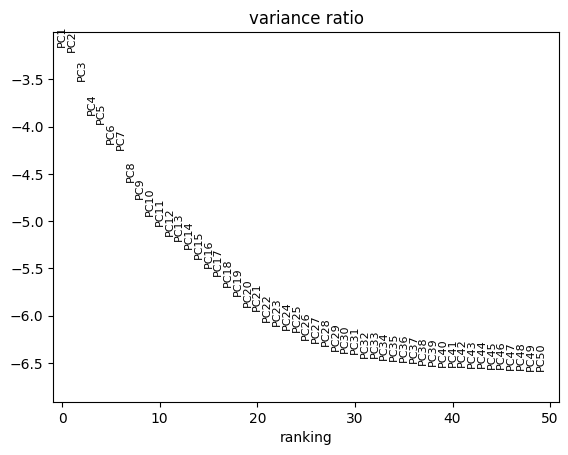

In [49]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

The elbow of the above plot seems to be at around 30 where it starts to flatten

Calculating the neighbors of the top 30 PCs

In [50]:
sc.pp.neighbors(adata, n_pcs = 30)
adata

AnnData object with n_obs × n_vars = 5412 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'MT', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

adata now has obsp with 'distances' and 'connectivities' - both these matrices will be used to perform clustering

In [51]:
adata.obsp['distances'].toarray()

array([[0.        , 4.54027569, 4.31919319, ..., 0.        , 0.        ,
        0.        ],
       [4.54027569, 0.        , 4.36480615, ..., 0.        , 0.        ,
        0.        ],
       [4.31919319, 4.36480615, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
adata.obsp['connectivities'].toarray()

array([[0.        , 0.79654336, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79654336, 0.        , 0.89391977, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.89391977, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

5.5 Projecting the PCA components onto a 2D plane

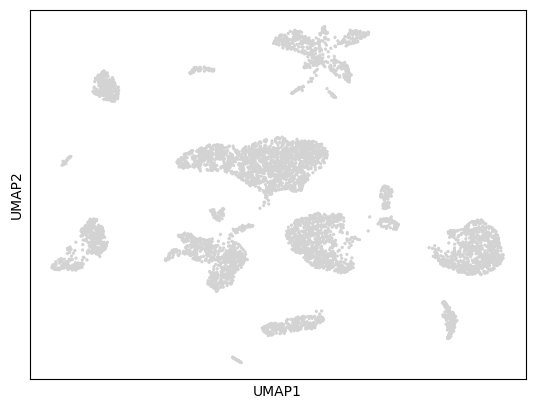

In [53]:
sc.tl.umap(adata)
sc.pl.umap(adata)

Each point represents a cell - these havent been assigned to clusters yet. Leiden algorithm is used for the cluster assignment

In [54]:
!pip install leidenalg

Having the resolution closer to 1 gives more clusters, having it closer to 0 gives fewer clusters

In [55]:
sc.tl.leiden(adata, resolution = 0.5)


<ipython-input-55-3de8455b2c18>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


adata now has a new column 'leiden' with a numerical leiden label. We will now color the umap according to the leiden label of each cell

In [56]:
adata.obs


,doublet,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,leiden
ATACTTCCAAGGTCTT-1_1,False,2122,5252.0,1.0,0.019040,4.0,0.076161,2
GATAGCTCAGGCTTGC-1_1,False,2167,4879.0,0.0,0.000000,0.0,0.000000,2
GACCCAGCACCCTATC-1_1,False,2150,4784.0,28.0,0.585284,4.0,0.083612,2
ATGCATGCAAACGTGG-1_1,False,2191,4747.0,0.0,0.000000,1.0,0.021066,2
CATAAGCCACCCAACG-1_1,False,2126,4728.0,1.0,0.021151,2.0,0.042301,1
...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,7
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827,10


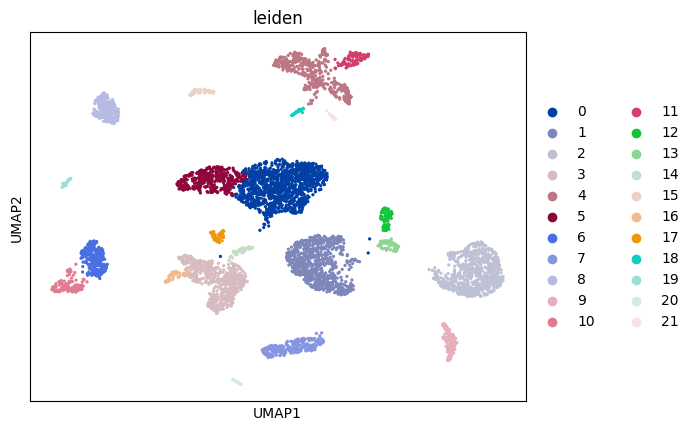

In [57]:
sc.pl.umap(adata, color=['leiden'])

# 6. Integrating the above steps to process all the samples

In [58]:
#!pip install pytorch torchvision torchaudio pytorch-cuda==11.7
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#!pip install jax jaxlib

In [59]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['difference'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.difference > 1)]

    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'

    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]


    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['MT'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['MT', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_MT < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

In [60]:
import os

In [61]:
out = []
for file in os.listdir('/raw_counts/'):
    out.append(pp('/raw_counts/' + file))

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|██████████| 400/400 [01:18<00:00,  5.14it/s, v_num=1, train_loss_step=293, train_loss_epoch=334]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:18<00:00,  5.11it/s, v_num=1, train_loss_step=293, train_loss_epoch=334]
INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/co

Epoch 167/400:  42%|████▏     | 167/400 [00:36<00:50,  4.59it/s, v_num=1, train_loss_step=0.195, train_loss_epoch=0.283]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.262. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:160: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may

Epoch 400/400: 100%|██████████| 400/400 [02:26<00:00,  2.77it/s, v_num=1, train_loss_step=312, train_loss_epoch=322]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:26<00:00,  2.74it/s, v_num=1, train_loss_step=312, train_loss_epoch=322]
INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/co

Epoch 286/400:  72%|███████▏  | 286/400 [02:00<00:48,  2.37it/s, v_num=1, train_loss_step=0.229, train_loss_epoch=0.285]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.275. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:160: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


Checking to see if we have an adata object in the out[] list

In [62]:
out

[View of AnnData object with n_obs × n_vars = 2952 × 34546
     obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
     var: 'MT', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 5960 × 34546
     obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
     var: 'MT', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts']

In [63]:
adata = sc.concat(out)

In [64]:
adata

AnnData object with n_obs × n_vars = 8912 × 34546
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'

We can see that we have 9k cells with 34k genes

We are only keeping genes that are in at least 10 cells

In [65]:
sc.pp.filter_genes(adata, min_cells = 10)

In [66]:
adata

AnnData object with n_obs × n_vars = 8912 × 20751
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

The number of genes went from 34k to 21k

In [67]:
adata.X

array([[0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

adata is a dense matrix that takes up a lot of memory. We will now convert this into a sparse matrix to reduce file size. This can also be done while loading the samples to save memory

In [68]:
from scipy.sparse import csr_matrix

In [69]:
adata.X = csr_matrix(adata.X)

In [70]:
adata.X

<8912x20751 sparse matrix of type '<class 'numpy.float32'>'
	with 7763514 stored elements in Compressed Sparse Row format>

h5ad is the scanpy adata format

In [71]:
adata.write_h5ad('combined.h5ad')

# 7. Normalizing and clustering the combined data

7.1 Filtering genes and saving raw data

In [72]:
adata = sc.read_h5ad('combined.h5ad')
adata

AnnData object with n_obs × n_vars = 8912 × 20751
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

Checking out the number of cells for each sample

In [73]:
adata.obs.groupby('Sample').count()

<ipython-input-73-ef4b39e87ee7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Sample').count()


,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,,
C51ctr,5960,5960,5960,5960,5960,5960,5960,5960
L01cov,2952,2952,2952,2952,2952,2952,2952,2952


Filtering the genes even more - genes must be found in at least 100 cells

In [74]:
sc.pp.filter_genes(adata, min_cells = 100)

This brings it down to 15k genes

In [75]:
adata

AnnData object with n_obs × n_vars = 8912 × 11467
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

Saving the raw data

In [76]:
adata.layers['counts'] = adata.X.copy()

Log normalizing the counts like before for scvi

In [77]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [78]:
adata.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo
TTCGATTTCCCAGCGA-1_8,L01cov,False,2289,2289,5231.0,285.0,5.448289,31.0,0.592621
CTTTCGGTCATGGTAC-1_8,L01cov,False,2240,2240,4643.0,291.0,6.267499,3.0,0.064613
GACTATGTCAGCAGAG-1_8,L01cov,False,2271,2271,4604.0,216.0,4.691573,2.0,0.043440
GGACGTCCACTGAATC-1_8,L01cov,False,2089,2089,4558.0,241.0,5.287406,7.0,0.153576
AGATCGTTCTAGGCCG-1_8,L01cov,False,2022,2022,4540.0,296.0,6.519824,6.0,0.132159


For scvi, we want roughly half the number of genes than there are cells

In [79]:
adata

AnnData object with n_obs × n_vars = 8912 × 11467
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

7.2 Parameters for the scvi model with multiple samples

In [80]:
#sc.pp.highly_variable_genes(adata, n_top_genes=5000, subset = True, layer = 'counts',
#                            flavor = "seurat_v3", batch_key="Sample") #no batch_key if one sample

In [81]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_MT', 'total_counts', 'pct_counts_ribo'])

In [82]:
model = scvi.model.SCVI(adata)

In [83]:
model.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|██████████| 400/400 [05:01<00:00,  1.35it/s, v_num=1, train_loss_step=2.61e+3, train_loss_epoch=2.64e+3]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [05:01<00:00,  1.33it/s, v_num=1, train_loss_step=2.61e+3, train_loss_epoch=2.64e+3]


it is a numpy array with as many rows as there are cells

In [84]:
model.get_latent_representation()

array([[ 0.96859246,  2.130208  ,  0.06593719, ..., -0.4218923 ,
        -1.7616144 , -0.1802989 ],
       [-0.48752442,  0.72593796,  0.16799267, ..., -0.642583  ,
        -2.2389817 , -0.81714475],
       [ 0.54867524,  1.4973179 ,  0.24166182, ..., -0.03227782,
        -1.623838  , -1.262337  ],
       ...,
       [ 1.1348696 , -0.5642252 ,  0.73917055, ...,  0.9831657 ,
         0.29763818, -0.61120784],
       [ 0.5905952 ,  0.98890233, -0.9534534 , ..., -1.1737185 ,
         0.0216676 , -0.71772003],
       [-0.72086835, -0.3233323 ,  0.38969   , ...,  1.8410206 ,
        -0.13332796,  1.8644767 ]], dtype=float32)

In [85]:
model.get_latent_representation().shape

(8912, 10)

Saving this into adata under the obsm column

In [86]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [87]:
adata.obsm['X_scVI']

array([[ 0.96859246,  2.130208  ,  0.06593719, ..., -0.4218923 ,
        -1.7616144 , -0.1802989 ],
       [-0.48752442,  0.72593796,  0.16799267, ..., -0.642583  ,
        -2.2389817 , -0.81714475],
       [ 0.54867524,  1.4973179 ,  0.24166182, ..., -0.03227782,
        -1.623838  , -1.262337  ],
       ...,
       [ 1.1348696 , -0.5642252 ,  0.73917055, ...,  0.9831657 ,
         0.29763818, -0.61120784],
       [ 0.5905952 ,  0.98890233, -0.9534534 , ..., -1.1737185 ,
         0.0216676 , -0.71772003],
       [-0.72086835, -0.3233323 ,  0.38969   , ...,  1.8410206 ,
        -0.13332796,  1.8644767 ]], dtype=float32)

df with cells in rows and genes as columns, the values are normalized

In [88]:
model.get_normalized_expression(library_size = 1e4)

,LINC01409,LINC01128,NOC2L,HES4,AGRN,C1orf159,TTLL10,SDF4,UBE2J2,ACAP3,...,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL354822.1,AL592183.1,AC240274.1,DDX3Y
TTCGATTTCCCAGCGA-1_8,0.149700,0.053817,0.026289,0.001588,0.033771,0.344697,0.003083,1.382496,0.308575,0.576582,...,60.046429,10.925480,62.620785,12.696716,5.935500,24.596449,0.088800,0.121698,0.090212,2.575791
CTTTCGGTCATGGTAC-1_8,0.178233,0.195022,0.047881,0.009092,0.069576,0.252341,0.000352,0.514732,0.388610,0.413816,...,67.438446,10.484357,76.509506,19.313515,9.079605,33.999203,0.055179,0.212061,0.201503,1.212966
GACTATGTCAGCAGAG-1_8,0.136048,0.077438,0.092358,0.006031,0.081284,0.312262,0.011359,0.791511,0.267922,0.253012,...,36.686092,6.080538,46.786442,9.883816,6.412892,20.668200,0.297217,0.167164,0.074508,1.424313
GGACGTCCACTGAATC-1_8,0.154264,0.046219,0.101738,0.003861,0.142437,0.845536,0.003725,0.124927,0.375173,0.407876,...,60.167011,9.344722,70.013580,13.774970,7.261512,29.377609,0.036653,0.157684,0.043925,0.876874
AGATCGTTCTAGGCCG-1_8,0.131222,0.014499,0.046838,0.001869,0.056212,0.197028,0.001331,0.222631,0.278196,0.287508,...,64.525978,9.102759,77.823944,13.066649,7.233905,35.355717,0.042564,0.055173,0.056602,2.801337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,0.148152,0.041099,0.146859,0.016831,0.082575,0.604095,3.053563,0.004192,0.483093,0.097390,...,12.715429,1.433511,7.527693,2.551304,2.189280,4.748975,0.361391,1.211554,1.004078,0.146136
CACTGGGGTCTACGTA-1_1,0.171302,0.097350,0.137928,0.081649,0.241000,0.258811,0.000964,0.011430,0.628444,0.070349,...,1.665994,0.114543,1.422606,0.296340,0.352362,0.455673,0.237761,1.184112,0.078278,0.026277
CATACTTGTAGAGGAA-1_1,0.145597,0.112970,0.351537,0.030472,0.014062,0.583349,0.007067,0.005636,0.408950,0.155163,...,4.935006,0.700334,3.063336,0.865088,0.834849,3.001678,0.193614,1.618552,0.058585,0.162372
TTTGGTTTCCACGGAC-1_1,0.051074,0.215070,0.181293,0.396673,0.302277,0.506546,0.119464,0.316651,0.629561,0.322223,...,3.252364,1.625389,4.245865,0.665279,0.513785,3.112188,0.037533,1.571569,0.275990,0.227553


In [89]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [90]:
adata.layers['scvi_normalized']

array([[0.17843737, 0.0473871 , 0.02683185, ..., 0.12188168, 0.07228246,
        2.2013428 ],
       [0.1620831 , 0.2248156 , 0.04089619, ..., 0.19615509, 0.22077572,
        1.1925846 ],
       [0.15065353, 0.08403572, 0.10405423, ..., 0.1900377 , 0.07036832,
        1.4518714 ],
       ...,
       [0.2241638 , 0.09655515, 0.28244   , ..., 1.6158369 , 0.02371019,
        0.10881988],
       [0.06029537, 0.30268556, 0.16676737, ..., 2.0963726 , 0.17372338,
        0.33702284],
       [0.13790688, 0.07583826, 0.3310491 , ..., 1.1516328 , 0.05421183,
        0.0162303 ]], dtype=float32)

7.3 Clustering

Using the latent representation from scvi to calculate the neighbors

In [91]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [92]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

Plotting 2 umaps - one with clusters labelled and one with the samples labelled

In the 2nd sample umap we want to look out for an even distribution of colors in all clusters to see that the samples were integrated properly

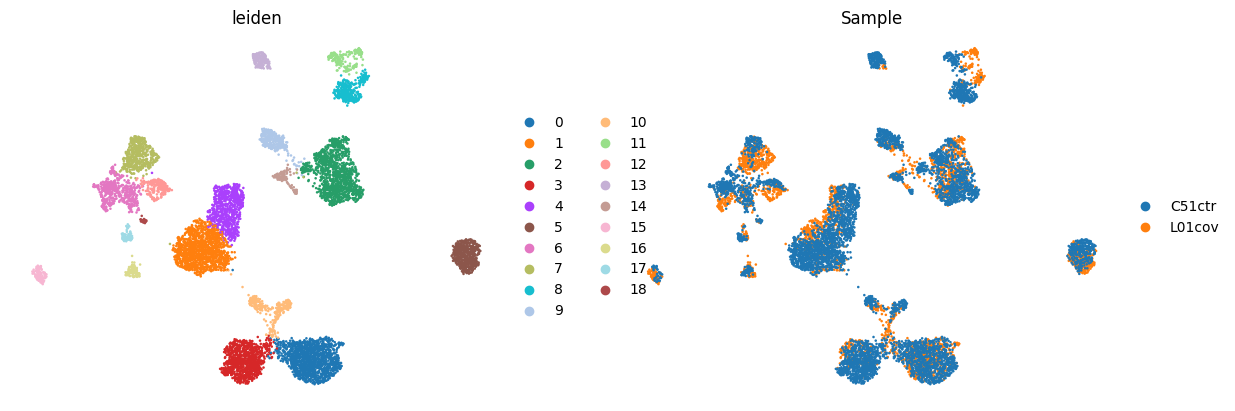

In [93]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [94]:
adata.write_h5ad('integrated.h5ad')

# 8. Labelling cell types to find markers

8.1 Finding significant genes in each cluster

This updates a new layer in adata

In [109]:
sc.tl.leiden(adata, resolution = 0.5)

Retrieving marker genes just based on the leiden in the raw data

In [110]:
sc.tl.rank_genes_groups(adata, 'leiden')

Plotting the marker genes (ranked) for each gene group - top 20 genes.

The most significant genes are towards the left of the plots

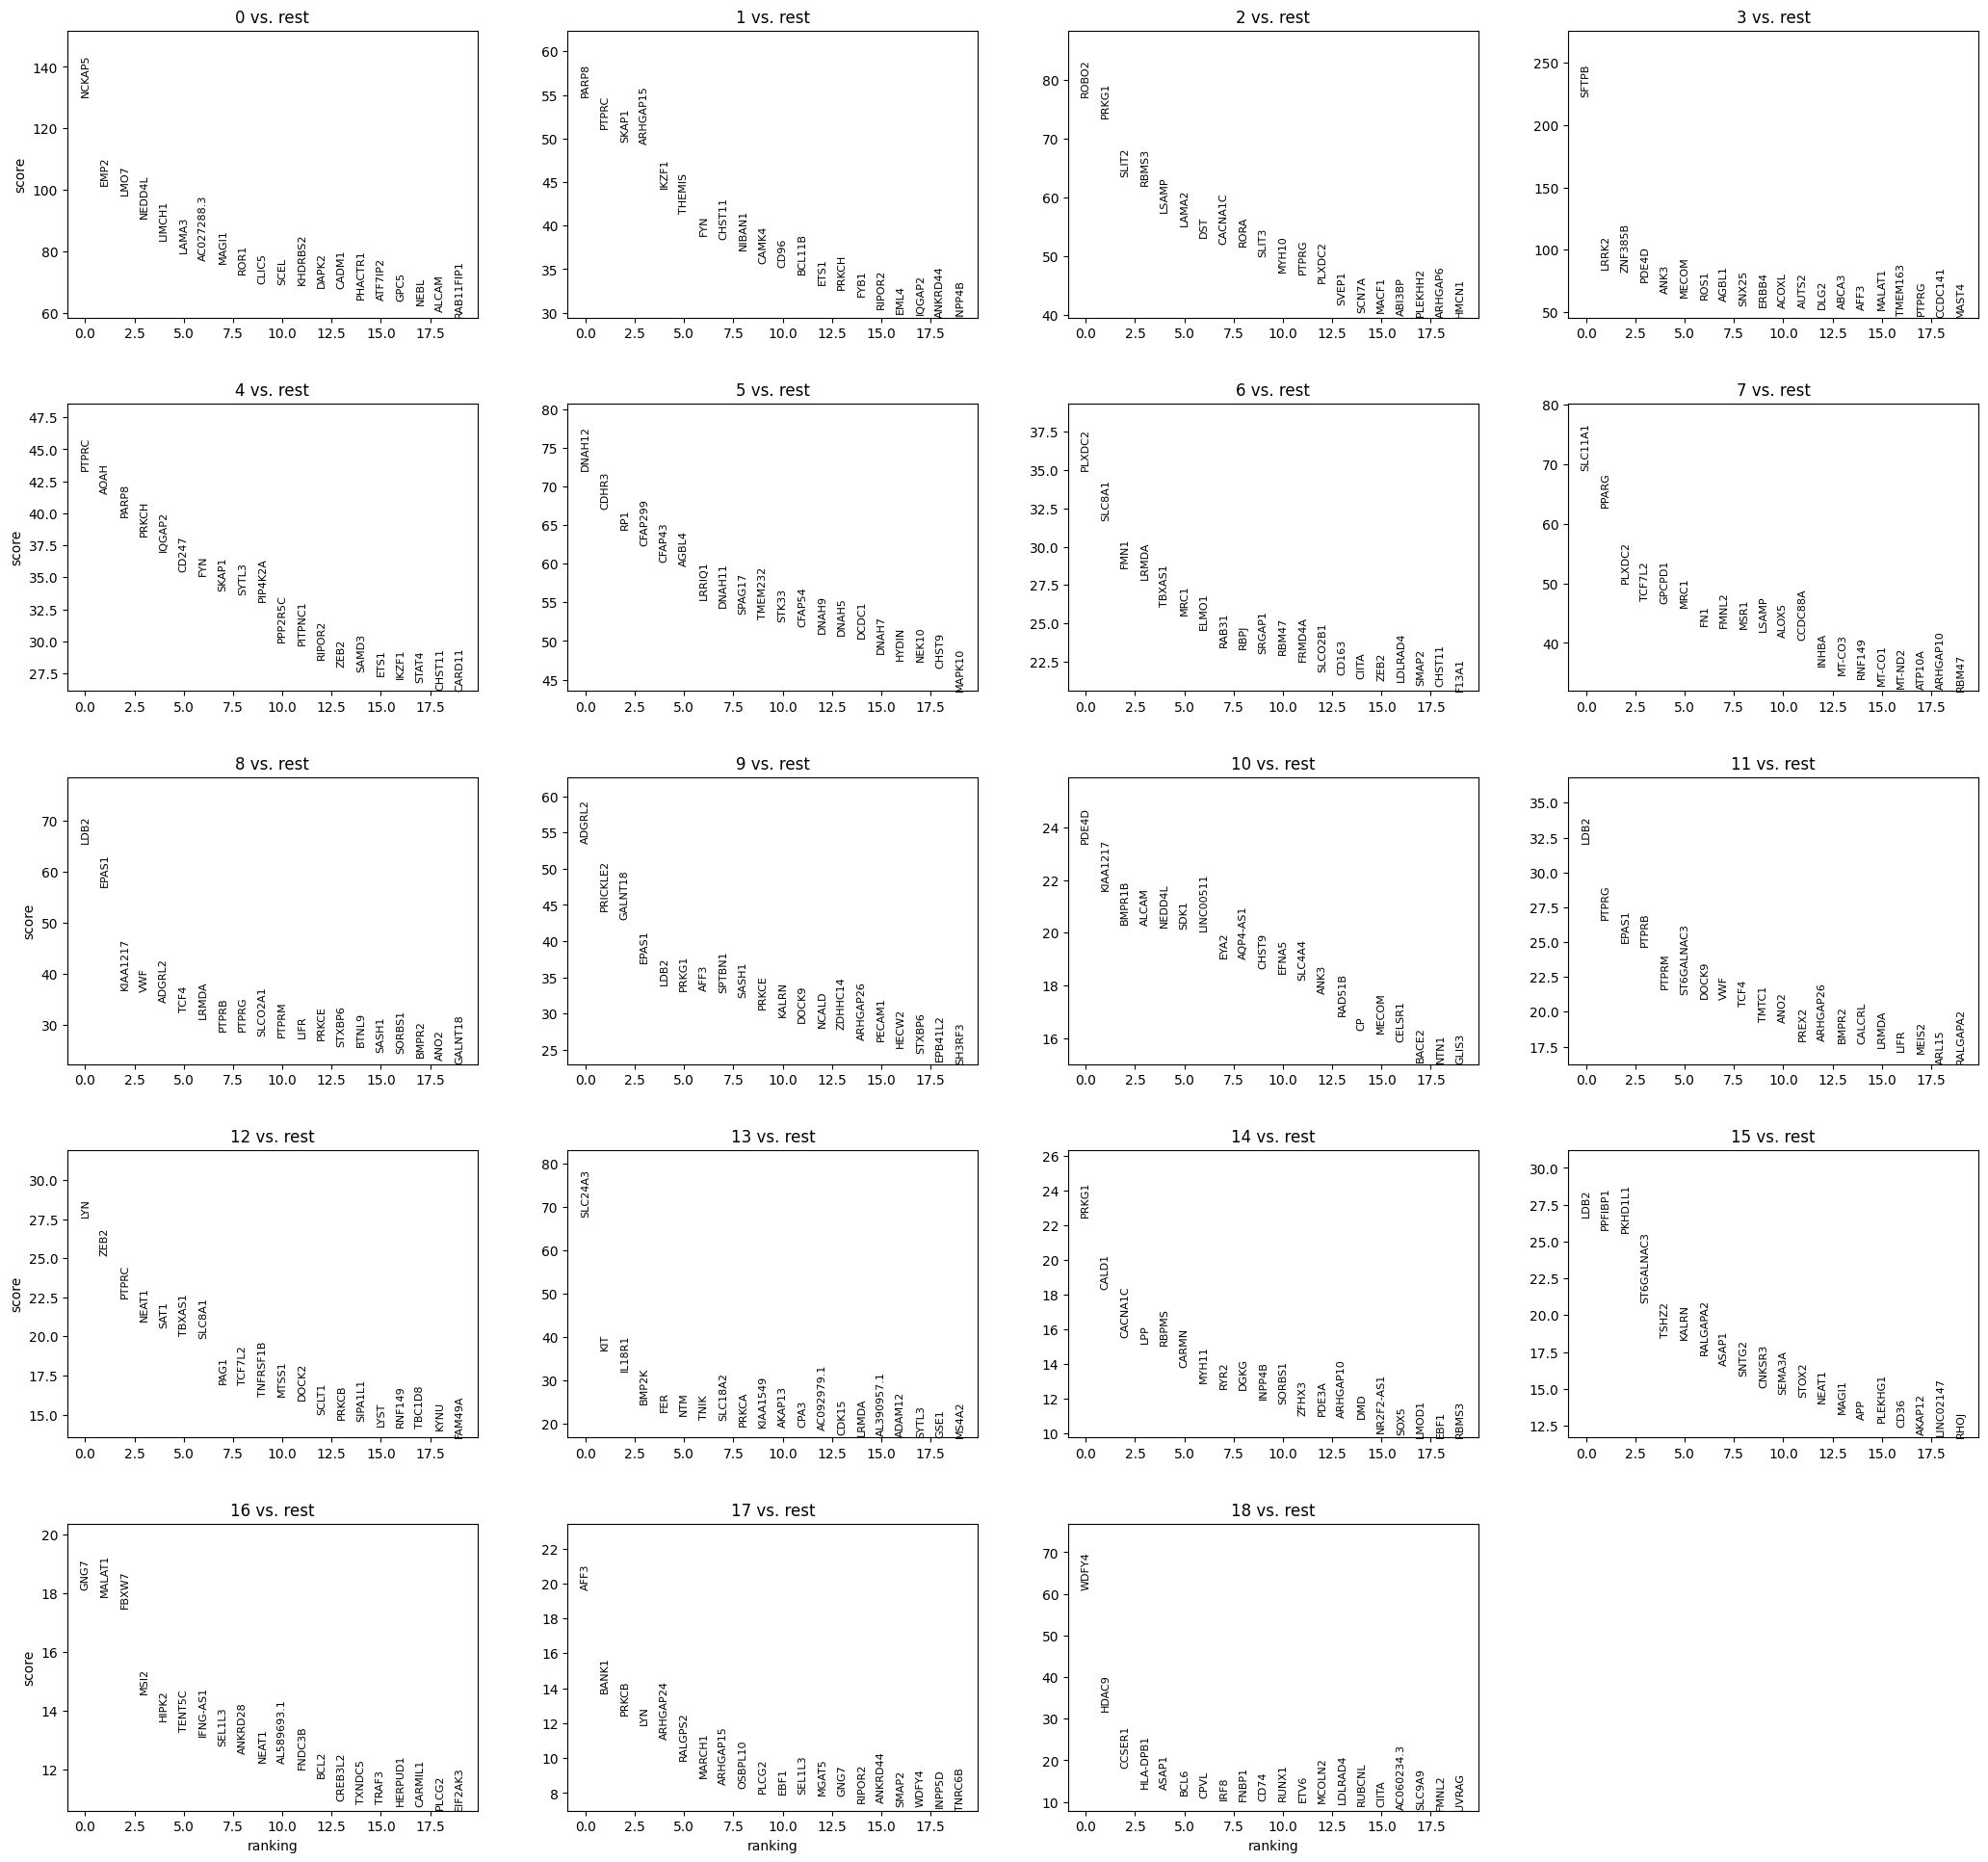

In [111]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

We then use scanpy.get.rank_gene_groups to get a df where the group is the latent cluster and we have the gene symbol, logFC and the p values

We then filter out padj <0.05 and logFC >0.5

In [112]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,NCKAP5,130.274841,7.987598,0.000000,0.000000
1,0,EMP2,101.402390,7.392354,0.000000,0.000000
2,0,LMO7,98.327362,6.157702,0.000000,0.000000
3,0,NEDD4L,90.842598,5.204486,0.000000,0.000000
4,0,LIMCH1,83.706223,4.579753,0.000000,0.000000
...,...,...,...,...,...,...
206792,18,OSBP2,2.365522,2.829067,0.024023,0.049148
206793,18,CEP170,2.365136,1.782627,0.024035,0.049164
206794,18,GRB2,2.362291,1.518173,0.024184,0.049450
206795,18,GNB1,2.361266,1.284642,0.024237,0.049550


8.2 Differential expression

In [113]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 19/19 [01:05<00:00,  3.46s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
EMP2,0.9998,0.0002,8.516943,0.003491,0.000108,0.0,0.25,6.436839,6.352319,2.416568,...,6.731912,0.093014,0.926883,0.062980,38.308987,0.669696,True,0 vs Rest,0,Rest
SCEL,0.9998,0.0002,8.516943,0.001614,0.000028,0.0,0.25,8.897744,8.524527,3.903128,...,3.238547,0.014554,0.822747,0.009526,19.285496,0.088419,True,0 vs Rest,0,Rest
AL355499.1,0.9998,0.0002,8.516943,0.001061,0.000010,0.0,0.25,9.830746,9.589779,3.579824,...,2.180203,0.000529,0.714919,0.000529,12.211287,0.003647,True,0 vs Rest,0,Rest
GALNT13,0.9996,0.0004,7.823621,0.000470,0.000003,0.0,0.25,11.298078,11.129431,4.166530,...,0.672084,0.001058,0.338257,0.000926,3.613453,0.008308,True,0 vs Rest,0,Rest
AC095050.1,0.9996,0.0004,7.823621,0.000142,0.000002,0.0,0.25,8.731184,8.190412,3.628757,...,0.313146,0.000529,0.214180,0.000529,1.803885,0.002676,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXOC4,0.6224,0.3776,0.499748,0.000633,0.000665,0.0,0.25,-0.078402,-0.027195,0.523135,...,0.911765,0.987315,0.470588,0.513742,7.746331,7.536628,False,18 vs Rest,18,Rest
PUM1,0.6180,0.3820,0.481068,0.000269,0.000284,0.0,0.25,-0.051161,-0.027781,0.491531,...,0.441176,0.409679,0.352941,0.315274,3.421422,3.313130,False,18 vs Rest,18,Rest
ZNF638,0.5896,0.4104,0.362312,0.000379,0.000394,0.0,0.25,-0.003999,-0.027442,0.526886,...,0.382353,0.563890,0.352941,0.383645,2.683007,4.586716,False,18 vs Rest,18,Rest
ASH1L,0.5816,0.4184,0.329345,0.000488,0.000503,0.0,0.25,-0.008238,-0.005252,0.449753,...,0.764706,0.620101,0.617647,0.411354,5.494544,5.048164,False,18 vs Rest,18,Rest


Filtering out FDR 0.05 is True and logFC mean > 0.5

This df now has the list of marker genes

In [114]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
EMP2,0.9998,0.0002,8.516943,0.003491,0.000108,0.0,0.25,6.436839,6.352319,2.416568,...,6.731912,0.093014,0.926883,0.062980,38.308987,0.669696,True,0 vs Rest,0,Rest
SCEL,0.9998,0.0002,8.516943,0.001614,0.000028,0.0,0.25,8.897744,8.524527,3.903128,...,3.238547,0.014554,0.822747,0.009526,19.285496,0.088419,True,0 vs Rest,0,Rest
AL355499.1,0.9998,0.0002,8.516943,0.001061,0.000010,0.0,0.25,9.830746,9.589779,3.579824,...,2.180203,0.000529,0.714919,0.000529,12.211287,0.003647,True,0 vs Rest,0,Rest
GALNT13,0.9996,0.0004,7.823621,0.000470,0.000003,0.0,0.25,11.298078,11.129431,4.166530,...,0.672084,0.001058,0.338257,0.000926,3.613453,0.008308,True,0 vs Rest,0,Rest
AC095050.1,0.9996,0.0004,7.823621,0.000142,0.000002,0.0,0.25,8.731184,8.190412,3.628757,...,0.313146,0.000529,0.214180,0.000529,1.803885,0.002676,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HAUS4,0.9088,0.0912,2.299070,0.000016,0.000013,0.0,0.25,0.669553,0.645684,2.169477,...,0.000000,0.011940,0.000000,0.011489,0.000000,0.088736,True,18 vs Rest,18,Rest
DAGLB,0.9086,0.0914,2.296659,0.000081,0.000043,0.0,0.25,1.268063,1.208228,1.368021,...,0.147059,0.043253,0.117647,0.040775,1.006854,0.317283,True,18 vs Rest,18,Rest
TM9SF2,0.9086,0.0914,2.296659,0.000232,0.000096,0.0,0.25,1.414199,1.372648,1.173668,...,0.264706,0.126380,0.264706,0.109935,2.615917,0.935063,True,18 vs Rest,18,Rest
AC005726.1,0.9086,0.0914,2.296659,0.000024,0.000015,0.0,0.25,1.186237,1.113231,1.852246,...,0.058824,0.013854,0.058824,0.013291,0.255581,0.108580,True,18 vs Rest,18,Rest


We can see that there are 18 clusters

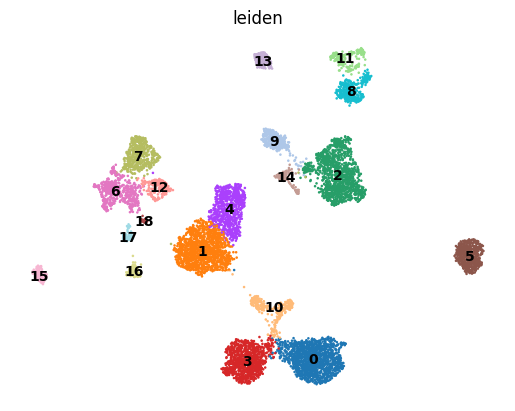

In [115]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

Starting with cell types that we know likely exist in the dataset - blood cells.Blood cells as an indicator to increase or decrease the resolution of clustering.

for instance, we can start with cd45(PTPRC), Tcell(CD3E), cd4+(CD4), cd8+(CD8A)

From the 2nd plot, the T cell cluster is clear and in the 3rd plot within the T cell cluster, we have the CD4

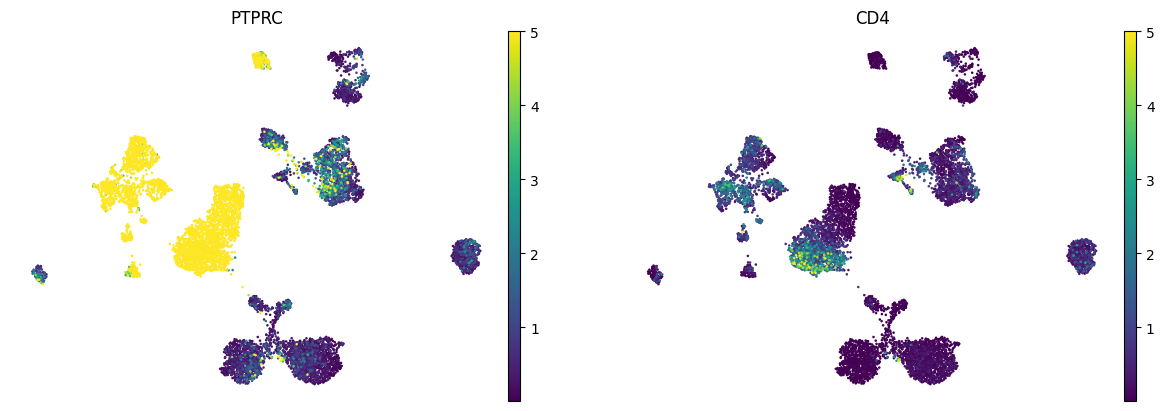

In [117]:
sc.pl.umap(adata, color = ['PTPRC', 'CD4'], frameon = False, layer = 'scvi_normalized', vmax = 5)

Increasing the resolution from 0.5 to 0.8 to 1

In [118]:
sc.tl.leiden(adata, resolution = 1)

Rerunning the code for marker genes

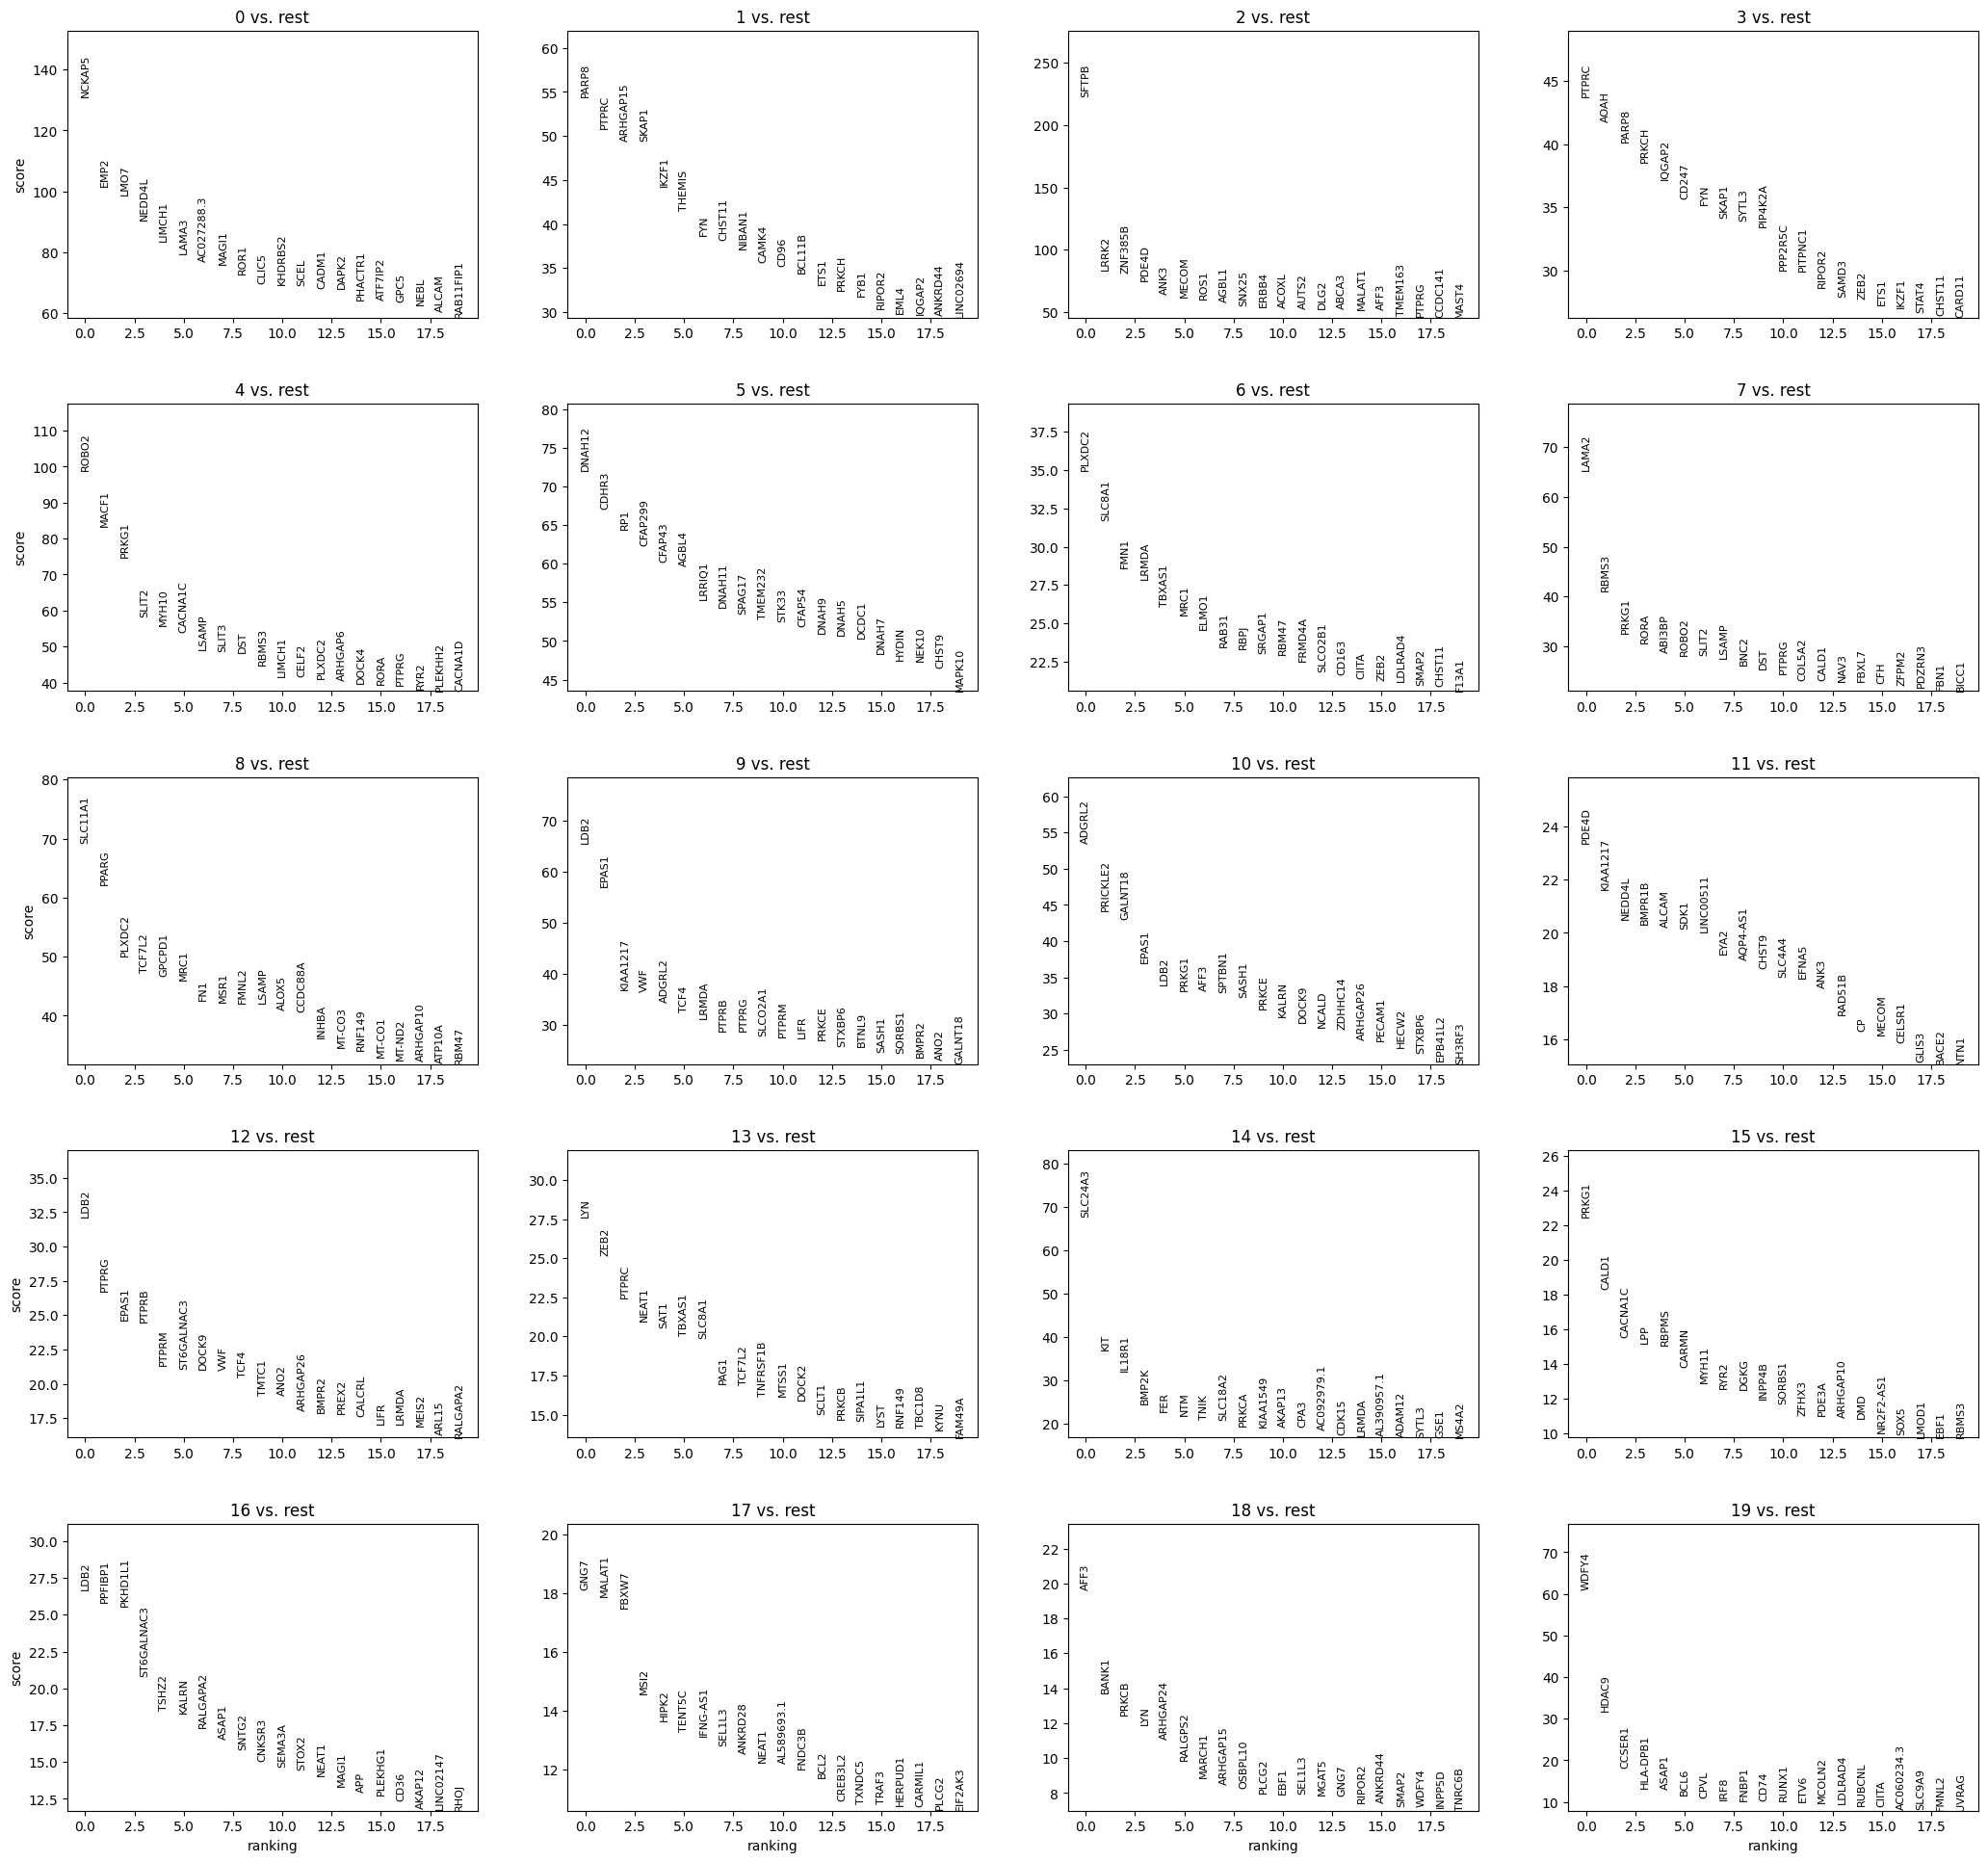

In [119]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [120]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,NCKAP5,131.051788,7.992691,0.000000,0.000000
1,0,EMP2,101.634392,7.392048,0.000000,0.000000
2,0,LMO7,98.690208,6.162188,0.000000,0.000000
3,0,NEDD4L,90.696495,5.201605,0.000000,0.000000
4,0,LIMCH1,83.622528,4.579174,0.000000,0.000000
...,...,...,...,...,...,...
218259,19,OSBP2,2.365522,2.829067,0.024023,0.049148
218260,19,CEP170,2.365136,1.782627,0.024035,0.049164
218261,19,GRB2,2.362291,1.518173,0.024184,0.049450
218262,19,GNB1,2.361266,1.284642,0.024237,0.049550


In [121]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 20/20 [01:08<00:00,  3.42s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
AL355499.1,1.0000,0.0000,18.420681,0.001051,0.000010,0.0,0.25,9.651425,9.432579,3.509598,...,2.183434,0.000529,0.715976,0.000529,12.229345,0.003646,True,0 vs Rest,0,Rest
NCKAP5,0.9996,0.0004,7.823621,0.007287,0.000281,0.0,0.25,5.953097,5.882648,2.260674,...,19.295870,0.214022,0.964497,0.097884,108.181747,1.833801,True,0 vs Rest,0,Rest
LAMA3,0.9994,0.0006,7.417964,0.002501,0.000094,0.0,0.25,6.929089,6.982559,2.960649,...,4.343927,0.085714,0.875000,0.051455,25.243126,0.514149,True,0 vs Rest,0,Rest
EMP2,0.9994,0.0006,7.417964,0.003486,0.000109,0.0,0.25,6.434937,6.252815,2.443004,...,6.740375,0.093254,0.927515,0.063095,38.349003,0.672491,True,0 vs Rest,0,Rest
ROR1-AS1,0.9994,0.0006,7.417964,0.000212,0.000001,0.0,0.25,10.384708,9.973581,4.326546,...,0.368343,0.000000,0.231509,0.000000,2.014960,0.000000,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXOC4,0.6290,0.3710,0.527929,0.000632,0.000663,0.0,0.25,-0.076682,-0.029703,0.530512,...,0.911765,0.987315,0.470588,0.513742,7.746331,7.536628,False,19 vs Rest,19,Rest
PUM1,0.6138,0.3862,0.463314,0.000270,0.000284,0.0,0.25,-0.046327,-0.034545,0.489903,...,0.441176,0.409679,0.352941,0.315274,3.421422,3.313130,False,19 vs Rest,19,Rest
ZNF638,0.5992,0.4008,0.402133,0.000379,0.000393,0.0,0.25,-0.002354,-0.029156,0.525191,...,0.382353,0.563890,0.352941,0.383645,2.683007,4.586716,False,19 vs Rest,19,Rest
ANKRD17,0.5900,0.4100,0.363965,0.000417,0.000437,0.0,0.25,-0.034905,-0.053484,0.472426,...,0.470588,0.611538,0.323529,0.394796,2.856065,4.780357,False,19 vs Rest,19,Rest


In [122]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
AL355499.1,1.0000,0.0000,18.420681,0.001051,0.000010,0.0,0.25,9.651425,9.432579,3.509598,...,2.183434,0.000529,0.715976,0.000529,12.229345,0.003646,True,0 vs Rest,0,Rest
NCKAP5,0.9996,0.0004,7.823621,0.007287,0.000281,0.0,0.25,5.953097,5.882648,2.260674,...,19.295870,0.214022,0.964497,0.097884,108.181747,1.833801,True,0 vs Rest,0,Rest
LAMA3,0.9994,0.0006,7.417964,0.002501,0.000094,0.0,0.25,6.929089,6.982559,2.960649,...,4.343927,0.085714,0.875000,0.051455,25.243126,0.514149,True,0 vs Rest,0,Rest
EMP2,0.9994,0.0006,7.417964,0.003486,0.000109,0.0,0.25,6.434937,6.252815,2.443004,...,6.740375,0.093254,0.927515,0.063095,38.349003,0.672491,True,0 vs Rest,0,Rest
ROR1-AS1,0.9994,0.0006,7.417964,0.000212,0.000001,0.0,0.25,10.384708,9.973581,4.326546,...,0.368343,0.000000,0.231509,0.000000,2.014960,0.000000,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDV3,0.9086,0.0914,2.296659,0.000078,0.000034,0.0,0.25,1.359723,1.272884,1.666832,...,0.088235,0.046970,0.088235,0.044041,0.690991,0.349021,True,19 vs Rest,19,Rest
ZNF362,0.9086,0.0914,2.296659,0.000068,0.000033,0.0,0.25,0.895587,0.907269,1.813143,...,0.176471,0.037959,0.147059,0.036044,1.231007,0.307272,True,19 vs Rest,19,Rest
ARHGAP31,0.9086,0.0914,2.296659,0.000473,0.000248,0.0,0.25,2.091731,1.632529,2.402326,...,0.735294,0.303563,0.411765,0.184276,5.284161,2.289103,True,19 vs Rest,19,Rest
AC007622.2,0.9084,0.0916,2.294253,0.000031,0.000012,0.0,0.25,1.433644,1.360205,1.687122,...,0.029412,0.015995,0.029412,0.014981,0.287505,0.109974,True,19 vs Rest,19,Rest


8.3 Labelling the cell clusters

On increasing the resolution, we now have 19 clusters

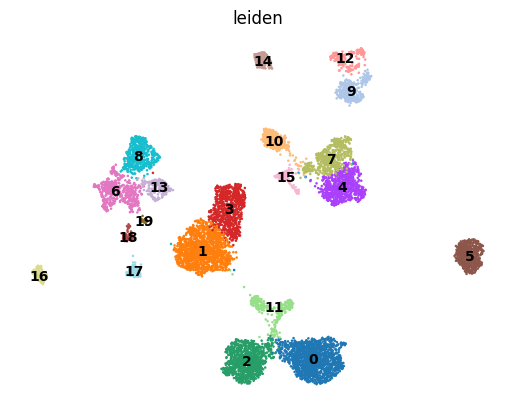

In [123]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

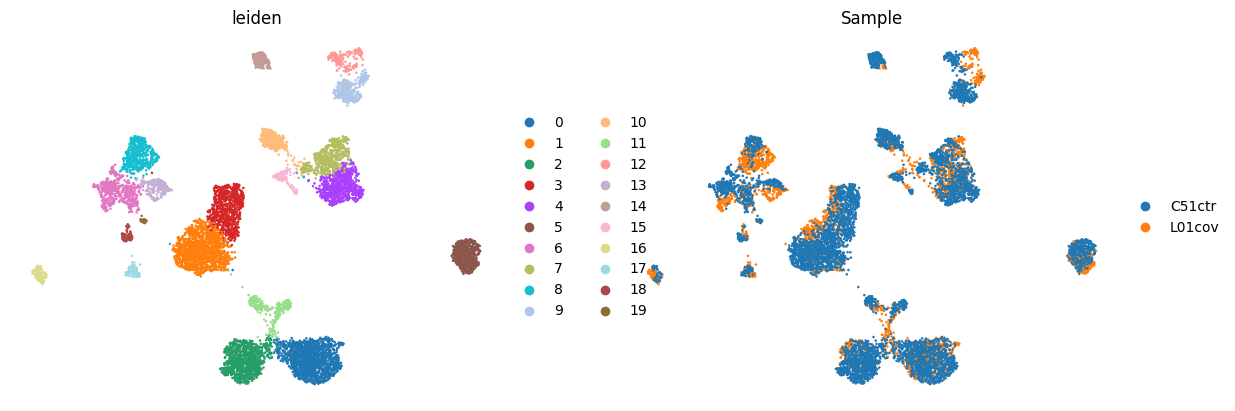

In [124]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

AGER is a marker for AT1 and SFTPC is for AT2. Cluster 0 is AT1 and and cluster 2 is AT2

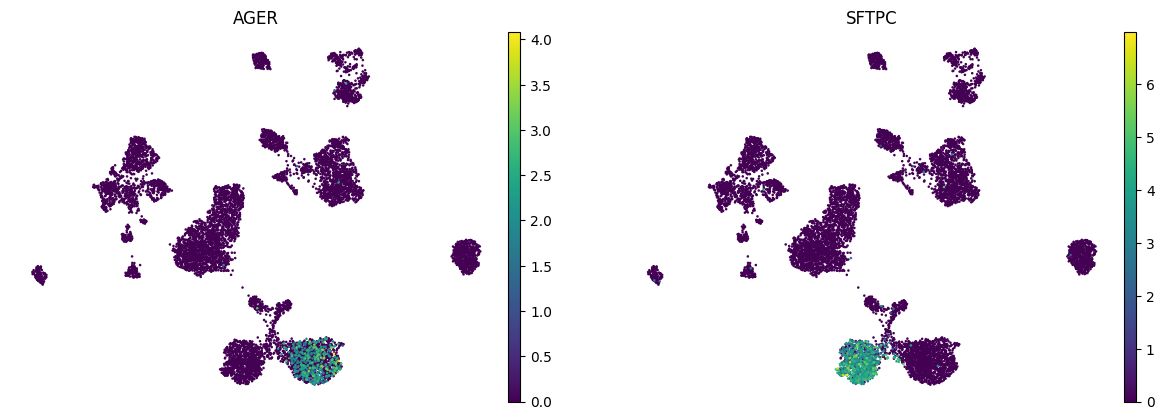

In [142]:
sc.pl.umap(adata, color = ['AGER', 'SFTPC'], frameon = False)

In [125]:
markers[markers.names == 'CD4']

,group,names,scores,logfoldchanges,pvals,pvals_adj
12047,1,CD4,6.411283,1.787558,1.968604e-10,5.139795e-10
69285,6,CD4,6.383400,2.406350,3.848643e-10,1.536643e-09
93417,8,CD4,5.316862,1.836094,1.609382e-07,4.204780e-07
149855,13,CD4,2.686317,1.646943,7.831741e-03,1.621350e-02


We see that CD4 cells show a significant logFC in cluster 6

Change the markers.group number (leiden value) to see the highest logFC genes in each cluster

In [151]:
markers[markers.group == '1'].sort_values(by='logfoldchanges', ascending=False).head(10)

,group,names,scores,logfoldchanges,pvals,pvals_adj
11476,1,CAMK4,35.624279,6.478575,1.743748e-194,4.513670e-193
11472,1,THEMIS,41.513641,6.351748,2.330163e-241,8.675319e-240
11486,1,LINC02694,29.376102,6.276387,1.025948e-145,1.846868e-144
11689,1,UBASH3A,11.937366,5.996005,3.156251e-31,1.333066e-30
11687,1,CD28,11.962324,5.734053,2.401423e-31,1.018008e-30
11477,1,CD96,35.176224,5.332643,5.195978e-192,1.329962e-190
11830,1,AC010275.1,9.044925,5.235998,5.366441e-19,1.699447e-18
11478,1,BCL11B,34.494156,5.102422,6.238025e-187,1.535009e-185
11646,1,LINC00426,13.387277,4.982851,2.251948e-38,1.108763e-37
11470,1,SKAP1,49.425156,4.979700,2.541523e-312,1.583894e-310


Use https://david.ncifcrf.gov/tools.jsp to enter list of genes to verify the cluster. We can also enter the gene name in https://panglaodb.se/ to reference what type of cell the cluster might be

We make a dictionary that goes from 0 to 19
and then manually fill it out when we decide what a cluster is. This would be more accurate than automatic labelling

In [206]:
cell_type = {"0":"AT1",
"1":"T-cell",
"2":"AT2",
"3":"NK cells",
"4":"Neuronal cell",
"5":"Ependymal cell",
"6":"Denditic cell",
"7":"Fibroblast",
"8":"Denditic cell",
"9":"Endothelial cell",
"10":"Endothelial cell",
"11":"AT2",
"12":"Endothelial cell",
"13":"Denditic cell",
"14":"Mast cell",
"15":"Smooth muscle cell",
"16":"Endothelial cell",
"17":"B-cell",
"18":"B-cell",
"19":"Denditic cell"
}

In [212]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

Plotting the now annotated cell types

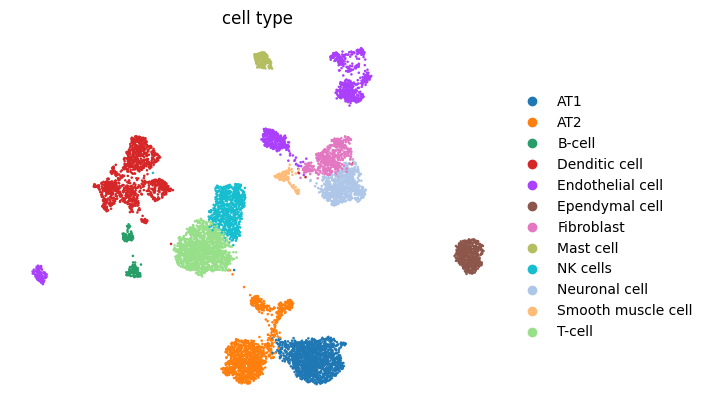

In [213]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [227]:
#adata.obs = adata.obs.drop(columns = ['cell_type'])
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,condition
TTCGATTTCCCAGCGA-1_8,L01cov,False,2289,2289,5231.0,285.0,5.448289,31.0,0.592621,0,0,13,1.975894,Denditic cell,COVID19
CTTTCGGTCATGGTAC-1_8,L01cov,False,2240,2240,4643.0,291.0,6.267499,3.0,0.064613,0,0,6,2.206531,Denditic cell,COVID19
GACTATGTCAGCAGAG-1_8,L01cov,False,2271,2271,4604.0,216.0,4.691573,2.0,0.043440,0,0,8,2.243158,Denditic cell,COVID19
GGACGTCCACTGAATC-1_8,L01cov,False,2089,2089,4558.0,241.0,5.287406,7.0,0.153576,0,0,8,2.268088,Denditic cell,COVID19
AGATCGTTCTAGGCCG-1_8,L01cov,False,2022,2022,4540.0,296.0,6.519824,6.0,0.132159,0,0,8,2.247696,Denditic cell,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,C51ctr,False,355,355,410.0,3.0,0.731707,0.0,0.000000,0,0,5,26.246719,Ependymal cell,control
CACTGGGGTCTACGTA-1_1,C51ctr,False,346,346,403.0,0.0,0.000000,0.0,0.000000,0,0,0,25.641026,AT1,control
CATACTTGTAGAGGAA-1_1,C51ctr,False,360,360,410.0,2.0,0.487805,0.0,0.000000,0,0,1,25.062656,T-cell,control
TTTGGTTTCCACGGAC-1_1,C51ctr,False,299,299,405.0,0.0,0.000000,2.0,0.493827,0,0,12,25.188915,Endothelial cell,control


8.4 Saving the markers, data and model

In [228]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [229]:
adata.write_h5ad('integrated.h5ad')

In [251]:
model.save('model.model')

# 9. Cell type analysis

9.1 Counting the cells

In [230]:
adata = sc.read_h5ad('integrated.h5ad')

In [231]:
adata.obs.Sample.unique().tolist()

['L01cov', 'C51ctr']

Mapping the samples as covid and control

In [232]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

Condition column

In [233]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,condition
TTCGATTTCCCAGCGA-1_8,L01cov,False,2289,2289,5231.0,285.0,5.448289,31.0,0.592621,0,0,13,1.975894,Denditic cell,COVID19
CTTTCGGTCATGGTAC-1_8,L01cov,False,2240,2240,4643.0,291.0,6.267499,3.0,0.064613,0,0,6,2.206531,Denditic cell,COVID19
GACTATGTCAGCAGAG-1_8,L01cov,False,2271,2271,4604.0,216.0,4.691573,2.0,0.043440,0,0,8,2.243158,Denditic cell,COVID19
GGACGTCCACTGAATC-1_8,L01cov,False,2089,2089,4558.0,241.0,5.287406,7.0,0.153576,0,0,8,2.268088,Denditic cell,COVID19
AGATCGTTCTAGGCCG-1_8,L01cov,False,2022,2022,4540.0,296.0,6.519824,6.0,0.132159,0,0,8,2.247696,Denditic cell,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,C51ctr,False,355,355,410.0,3.0,0.731707,0.0,0.000000,0,0,5,26.246719,Ependymal cell,control
CACTGGGGTCTACGTA-1_1,C51ctr,False,346,346,403.0,0.0,0.000000,0.0,0.000000,0,0,0,25.641026,AT1,control
CATACTTGTAGAGGAA-1_1,C51ctr,False,360,360,410.0,2.0,0.487805,0.0,0.000000,0,0,1,25.062656,T-cell,control
TTTGGTTTCCACGGAC-1_1,C51ctr,False,299,299,405.0,0.0,0.000000,2.0,0.493827,0,0,12,25.188915,Endothelial cell,control


for calculating the frequency we count the number of cells in each cell type and the number of cells total in each sample.

Zipping the counts into a dictionary.

In [234]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

<ipython-input-234-5562b6606426>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata.obs.groupby(['Sample']).count()


{'C51ctr': 5960, 'L01cov': 2952}

In [236]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

<ipython-input-236-18efed32e38f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell type']).count()


,Sample,condition,cell type,doublet
0,C51ctr,control,AT1,852
1,C51ctr,control,AT2,939
2,C51ctr,control,B-cell,97
3,C51ctr,control,Denditic cell,597
4,C51ctr,control,Endothelial cell,638
5,C51ctr,control,Ependymal cell,266
6,C51ctr,control,Fibroblast,296
7,C51ctr,control,Mast cell,150
8,C51ctr,control,NK cells,568
9,C51ctr,control,Neuronal cell,458


Adding a total_cells column to the dictionary. The doublet column represents the counts

In [237]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells

cell_type_counts

,Sample,condition,cell type,doublet,total_cells,frequency
0,C51ctr,control,AT1,852,5960,0.142953
1,C51ctr,control,AT2,939,5960,0.157550
2,C51ctr,control,B-cell,97,5960,0.016275
3,C51ctr,control,Denditic cell,597,5960,0.100168
4,C51ctr,control,Endothelial cell,638,5960,0.107047
5,C51ctr,control,Ependymal cell,266,5960,0.044631
6,C51ctr,control,Fibroblast,296,5960,0.049664
7,C51ctr,control,Mast cell,150,5960,0.025168
8,C51ctr,control,NK cells,568,5960,0.095302
9,C51ctr,control,Neuronal cell,458,5960,0.076846


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

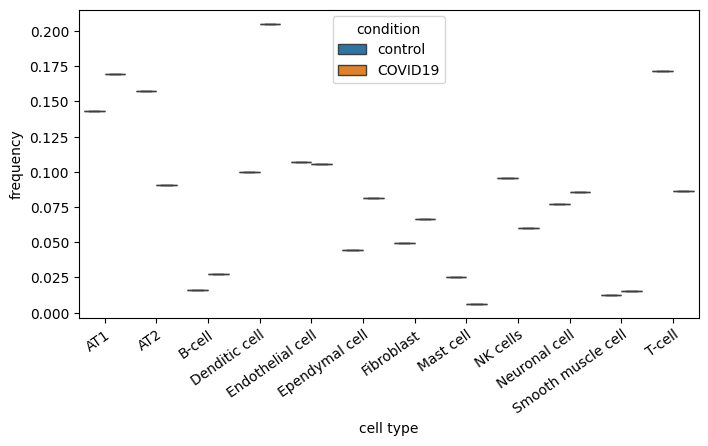

In [239]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'condition')
plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

# 10. Differential Expression Analysis

In [240]:
subset = adata[adata.obs['cell type'].isin(['AT1', 'AT2'])].copy()

This requires a dense array not a sparse one

In [242]:
subset.X = subset.X.toarray()

In [243]:
len(subset.var)

11467

In [244]:
subset

AnnData object with n_obs × n_vars = 2559 × 11467
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'condition'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

Subsetting the genes

In [245]:
sc.pp.filter_genes(subset, min_cells=100)

In [246]:
len(subset.var)

6278

In [247]:
subset.obs = subset.obs.rename(columns = {'cell type':'cell_type'})

In [261]:
model  = scvi.model.SCVI.load('model.model', adata)

INFO     File model.model/model.pt already downloaded                                                              


In [262]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [263]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell type'] == 'AT1'],
    idx2 = [adata.obs['cell type'] == 'AT2']
    )

DE...: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


In [264]:
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
NCKAP5,0.9996,0.0004,7.823621,0.007335,0.000281,0.0,0.25,5.296648,5.334368,1.588909,-0.423513,10.852002,19.295870,0.149959,0.964497,0.068766,108.181747,1.152729,True
UNC13D,0.9994,0.0006,7.417964,0.000117,0.000004,0.0,0.25,5.300368,5.342742,1.620474,-1.116138,11.077479,0.208580,0.001657,0.177515,0.001657,1.186256,0.016614,True
CPA6,0.9992,0.0008,7.130086,0.000343,0.000007,0.0,0.25,6.277364,6.232308,2.255002,-3.680614,15.150103,0.404585,0.000829,0.193047,0.000829,2.617385,0.008909,True
EMP2,0.9990,0.0010,6.906745,0.003503,0.000250,0.0,0.25,4.300889,4.175885,1.549462,-2.593130,9.968222,6.740375,0.294946,0.927515,0.193041,38.349003,1.744206,True
AL355499.1,0.9988,0.0012,6.724225,0.001056,0.000036,0.0,0.25,6.837500,6.329559,3.174944,-3.433251,18.508282,2.183434,0.002486,0.715976,0.002486,12.229345,0.020327,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARID1B,0.5304,0.4696,0.121750,0.000518,0.000594,0.0,0.25,-0.189458,-0.177355,0.364467,-1.555206,1.184418,1.098373,1.238612,0.579882,0.595692,6.316951,7.476053,False
TCF25,0.5274,0.4726,0.109710,0.000248,0.000238,0.0,0.25,0.066868,0.049113,0.408180,-1.267964,2.050298,0.364644,0.351285,0.289941,0.280033,2.220581,2.135083,False
HELZ,0.5124,0.4876,0.049610,0.000211,0.000237,0.0,0.25,-0.165749,-0.154515,0.366094,-1.786736,1.161492,0.388312,0.466447,0.303254,0.345485,2.297706,2.787742,False
TTC17,0.5080,0.4920,0.032003,0.000363,0.000349,0.0,0.25,0.072840,0.064617,0.391792,-1.479486,2.030556,0.690826,0.662802,0.446006,0.405965,4.133417,3.638008,False


In [265]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
HHIP,0.9974,0.0026,5.949637,4.890458e-07,1.404813e-04,0.0,0.25,-10.841323,-11.175735,4.331556,-24.037283,8.915122,0.000000,0.362883,0.000000,0.163215,0.000000,2.027147,True
PTGFR,0.9980,0.0020,6.212601,1.212647e-06,1.505177e-04,0.0,0.25,-8.914652,-8.854235,3.242931,-19.992655,2.552818,0.002959,0.279205,0.002959,0.185584,0.010178,1.511131,True
SLC46A2,0.9884,0.0116,4.445082,1.283656e-06,7.091118e-05,0.0,0.25,-8.198163,-8.832109,5.168438,-21.877764,13.426782,0.002219,0.125103,0.002219,0.101077,0.008408,0.630179,True
DMBT1,0.9924,0.0076,4.871977,1.451018e-06,3.225526e-04,0.0,0.25,-7.807064,-8.072420,3.459808,-18.339466,8.027610,0.000000,0.328086,0.000000,0.137531,0.000000,2.648019,True
PIGR,0.9930,0.0070,4.954819,4.096236e-06,9.263150e-05,0.0,0.25,-7.771792,-7.735916,4.387526,-24.173468,9.789972,0.002959,0.164872,0.002219,0.068766,0.024043,0.877273,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS4A15,0.9924,0.0076,4.871977,1.372541e-04,7.352696e-06,0.0,0.25,7.107685,7.173132,3.699357,-3.828538,19.038885,0.243343,0.004971,0.183432,0.004971,1.399520,0.024618,True
ANKRD1,0.9964,0.0036,5.623212,1.278122e-04,1.923243e-06,0.0,0.25,7.631781,7.465868,3.381686,-5.835455,20.347000,0.143491,0.000000,0.072485,0.000000,0.814564,0.000000,True
ROR1-AS1,0.9976,0.0024,6.029880,2.074581e-04,3.403508e-06,0.0,0.25,8.037937,7.762303,3.703092,-6.184121,23.121656,0.368343,0.000000,0.231509,0.000000,2.014960,0.000000,True
GALNT13,0.9984,0.0016,6.436144,4.673413e-04,6.480248e-06,0.0,0.25,8.186193,8.064091,3.044143,-2.797345,19.854351,0.673075,0.001657,0.338757,0.001657,3.618800,0.008163,True


In [266]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
HHIP,0.9974,0.0026,5.949637,4.890458e-07,1.404813e-04,0.0,0.25,-10.841323,-11.175735,4.331556,-24.037283,8.915122,0.000000,0.362883,0.000000,0.163215,0.000000,2.027147,True
PTGFR,0.9980,0.0020,6.212601,1.212647e-06,1.505177e-04,0.0,0.25,-8.914652,-8.854235,3.242931,-19.992655,2.552818,0.002959,0.279205,0.002959,0.185584,0.010178,1.511131,True
SLC46A2,0.9884,0.0116,4.445082,1.283656e-06,7.091118e-05,0.0,0.25,-8.198163,-8.832109,5.168438,-21.877764,13.426782,0.002219,0.125103,0.002219,0.101077,0.008408,0.630179,True
DMBT1,0.9924,0.0076,4.871977,1.451018e-06,3.225526e-04,0.0,0.25,-7.807064,-8.072420,3.459808,-18.339466,8.027610,0.000000,0.328086,0.000000,0.137531,0.000000,2.648019,True
PIGR,0.9930,0.0070,4.954819,4.096236e-06,9.263150e-05,0.0,0.25,-7.771792,-7.735916,4.387526,-24.173468,9.789972,0.002959,0.164872,0.002219,0.068766,0.024043,0.877273,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS4A15,0.9924,0.0076,4.871977,1.372541e-04,7.352696e-06,0.0,0.25,7.107685,7.173132,3.699357,-3.828538,19.038885,0.243343,0.004971,0.183432,0.004971,1.399520,0.024618,True
ANKRD1,0.9964,0.0036,5.623212,1.278122e-04,1.923243e-06,0.0,0.25,7.631781,7.465868,3.381686,-5.835455,20.347000,0.143491,0.000000,0.072485,0.000000,0.814564,0.000000,True
ROR1-AS1,0.9976,0.0024,6.029880,2.074581e-04,3.403508e-06,0.0,0.25,8.037937,7.762303,3.703092,-6.184121,23.121656,0.368343,0.000000,0.231509,0.000000,2.014960,0.000000,True
GALNT13,0.9984,0.0016,6.436144,4.673413e-04,6.480248e-06,0.0,0.25,8.186193,8.064091,3.044143,-2.797345,19.854351,0.673075,0.001657,0.338757,0.001657,3.618800,0.008163,True


In [275]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist() #top 25 and bottom 25 from sorted df

In [281]:
genes_to_remove = ['ANKRD1', 'NYAP2', 'PIGR']
genes_to_show = [gene for gene in genes_to_show if gene not in genes_to_remove]


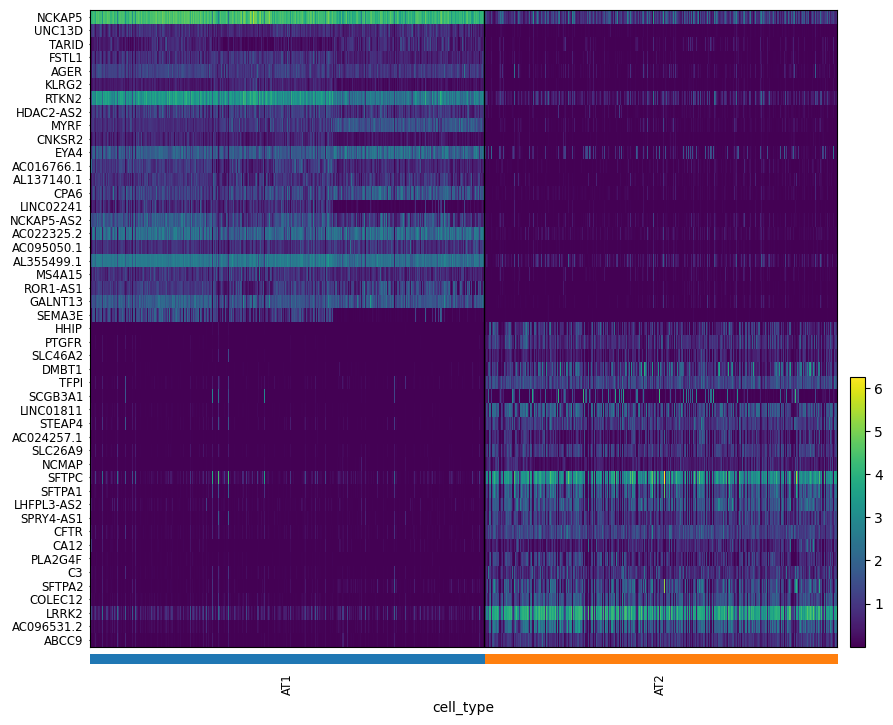

In [282]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)

# 11. GO enrichment

In [284]:
!pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.8 MB/s eta 0:00:00


In [285]:
import gseapy as gp

In [286]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [287]:
subset

AnnData object with n_obs × n_vars = 2559 × 6278
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

Just the upregulated genes

In [294]:
scvi_de[scvi_de.lfc_mean > 0].index.tolist()


['ERRFI1',
 'ANKRD36C',
 'TSHZ2',
 'LPAR1',
 'ABCC5',
 'TLL1',
 'MX2',
 'ATXN1',
 'GSK3B',
 'IFI44L',
 'ATXN2',
 'KRT19',
 'CSGALNACT1',
 'B2M',
 'UTRN',
 'ESYT2',
 'ARHGAP5',
 'ANKS1A',
 'NEBL',
 'PARD3B',
 'CD9',
 'GCNT2',
 'SCNN1B',
 'RBMS2',
 'PATJ',
 'GRIP1',
 'CAB39',
 'MPRIP',
 'ATP13A4',
 'PRMT2',
 'ITGB1',
 'ZFP36L1',
 'CUX1',
 'TYW1B',
 'AL022068.1',
 'ARRB1',
 'TOM1L2',
 'TSHZ3',
 'RNF213',
 'PDXK',
 'TSPAN5',
 'NT5C2',
 'XPO4',
 'CRY2',
 'RFFL',
 'ITGA3',
 'ABLIM1',
 'ABCC3',
 'ITSN1',
 'CCNY',
 'RDX',
 'MAGI1',
 'ENO4',
 'ROCK2',
 'MAP4',
 'ZC3H7A',
 'RNF19B',
 'SH3RF1',
 'GPRC5A',
 'ARHGAP44',
 'SIK2',
 'DOT1L',
 'IFNGR2',
 'FAM102A',
 'VPS35',
 'SPTAN1',
 'ATP9A',
 'MGAT4A',
 'ATP10D',
 'FERMT2',
 'CPEB2',
 'TMCC1',
 'SH3RF2',
 'WIPF1',
 'N4BP1',
 'ARAP2',
 'MYO1B',
 'MYO1D',
 'ZC3H14',
 'MFHAS1',
 'ELOVL5',
 'BMPR1B',
 'ZFPM2-AS1',
 'NAV2',
 'LIMCH1',
 'FMO2',
 'TMEM123',
 'SLC38A2',
 'LRRFIP1',
 'DOCK11',
 'TJP1',
 'COBL',
 'CLN8',
 'AC139769.2',
 'AC098617.1',
 'ATOH8

In [295]:
enr = gp.enrichr(gene_list= scvi_de[scvi_de.lfc_mean > 0].index.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

In [296]:
enr.results

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,ECM-receptor interaction,2.193177e-10,5.373284e-08,0,0,13.199019,2.935528e+02,ITGB1;LAMA5;LAMB3;ITGA3;LAMB2;ITGA2;LAMA3;LAMC...
1,KEGG_2021_Human,Focal adhesion,1.850816e-08,2.267250e-06,0,0,4.163963,7.413958e+01,ITGB1;GSK3B;LAMA5;ROCK2;LAMA3;PDGFA;ILK;LAMC2;...
2,KEGG_2021_Human,Amoebiasis,7.828742e-06,6.393473e-04,0,0,6.378771,7.499973e+01,LAMA5;COL4A2;LAMB3;COL4A1;LAMB2;ACTN1;COL4A4;C...
3,KEGG_2021_Human,Small cell lung cancer,1.261693e-05,7.727869e-04,0,0,4.971090,5.607624e+01,ITGB1;LAMA5;LAMB3;ITGA3;LAMB2;ITGA2;LAMA3;LAMC...
4,KEGG_2021_Human,Tight junction,2.632607e-05,1.288572e-03,0,0,3.215341,3.390561e+01,MAGI1;ITGB1;PATJ;ROCK2;ACTN1;ARPC1B;RDX;ARPC5;...
...,...,...,...,...,...,...,...,...,...
2750,GO_Biological_Process_2021,transcription by RNA polymerase II (GO:0006366),9.999892e-01,9.999951e-01,0,0,0.130619,1.412398e-06,RARG;PPARGC1A
2751,GO_Biological_Process_2021,DNA repair (GO:0006281),9.999921e-01,9.999951e-01,0,0,0.077375,6.141853e-07,DOT1L
2752,GO_Biological_Process_2021,"regulation of transcription, DNA-templated (GO...",9.999933e-01,9.999951e-01,0,0,0.467033,3.149622e-06,SP100;ZNF493;TSHZ3;MYRF;TSHZ2;WWC2;ILK;ARRB1;F...
2753,GO_Biological_Process_2021,cellular response to DNA damage stimulus (GO:0...,9.999936e-01,9.999951e-01,0,0,0.121775,7.842453e-07,CCND1;DOT1L


# 12. Comparison of control vs covid

Two genes from two different sample types

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


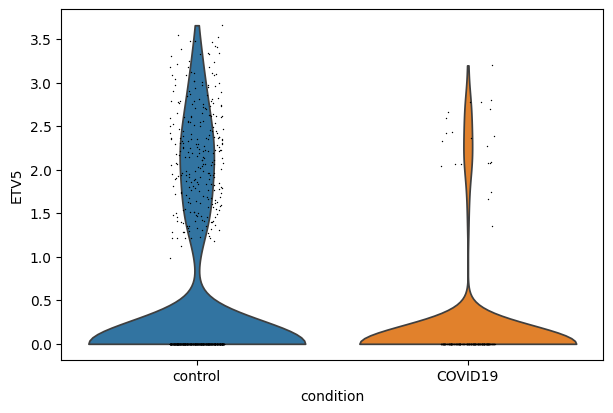

In [297]:
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition')

Checking for significance

In [298]:
from scipy import stats

i represents the index - where it lies in the var names

In [310]:
temp = subset[subset.obs.cell_type == 'AT2']

i = np.where(temp.var_names == 'ETV5')[0][0]

Taking a slice from the counts matrix

In [311]:
a = temp[temp.obs.condition == 'COVID19'].X[:,i]
b = temp[temp.obs.condition == 'control'].X[:,i]

non parametric test shows significance

In [312]:
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=99363.5, pvalue=4.22831305099321e-12)

#References:

1. Melms, J.C., Biermann, J., Huang, H. et al. A molecular single-cell lung atlas of lethal COVID-19. Nature 595, 114–119 (2021). https://doi.org/10.1038/s41586-021-03569-1